#Assignment 3.2: LSTM ASSIGNMENT

This assignment is aimed at implementing LSTMs that we had learnt in class. In this task, we'll implement a model that takes text data as input and returns the emotion behind the text.

## TEXT PRE-PROCESSING FOR NLP

**Import the dataset.**

In [23]:
#ENTER YOUR CODE HERE
import pandas as pd
df = pd.read_csv('/content/new_dataset.csv')

sentiment                                               text
0  Negative  @xnausikaax oh no! where did u order from? tha...
1  Negative  A great hard training weekend is over.  a coup...
2  Negative  Right, off to work  Only 5 hours to go until I...
3  Negative                    I am craving for japanese food 
4  Negative  Jean Michel Jarre concert tomorrow  gotta work...

**The dataset clearly has a large no. of redundant words, because that is simply how we humans talk. We'll first remove the stopwords.**


In [24]:
#ENTER YOUR CODE HERE
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
def remove_stopwords(df):
  new_df = []

  for word in df.split():
    if word in stopwords.words('english'):
      new_df.append(' ')
    else :
      new_df.append(word)
    # x = new_df[:]
    # new_df.clear()
  return " ".join(new_df)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
df['text'] = df['text'].apply(remove_stopwords)
df.head(5)

sentiment                                               text
0  Negative  @xnausikaax oh no!     u order from? that's ho...
1  Negative  A great hard training weekend   over.   couple...
2  Negative    Right,     work Only 5 hours   go   I'm free xD
3  Negative                        I   craving   japanese food
4  Negative  Jean Michel Jarre concert tomorrow gotta work ...

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


sentiment                                               text
0  Negative   @xnausikaax oh no! u order from? that's horrible
1  Negative  A great hard training weekend over. couple day...
2  Negative            Right, work Only 5 hours go I'm free xD
3  Negative                            I craving japanese food
4  Negative  Jean Michel Jarre concert tomorrow gotta work ...

**Next, we'll remove some other info we dont need right now, like the handle names.**

In [26]:
#ENTER YOUR CODE HERE
import string
string.punctuation
def remove_punc(df):
  for char in string.punctuation:
    df =df.replace(char,' ')
  return df
import re
def remove_handles(df):
  return re.sub(r'@\w+', '',df)

In [27]:
df['text'] = df['text'].apply(remove_handles)
df['text'] = df['text'].apply(remove_punc)
df.head(5)

sentiment                                               text
0  Negative           oh no      u order from  that s horrible
1  Negative  A great hard training weekend   over    couple...
2  Negative    Right      work Only 5 hours   go   I m free xD
3  Negative                        I   craving   japanese food
4  Negative  Jean Michel Jarre concert tomorrow gotta work ...

sentiment                                               text
0  Negative                 oh no u order from that s horrible
1  Negative  A great hard training weekend over couple days...
2  Negative             Right work Only 5 hours go I m free xD
3  Negative                            I craving japanese food
4  Negative  Jean Michel Jarre concert tomorrow gotta work ...

**Now, we'll perform stemming, wherein we'll reduce the words to their root form.**

In [28]:
#ENTER YOUR CODE HERE
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()
def lemmatize_words(df):
  return " ".join([lemmatizer.lemmatize(word) for word in df.split()])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [29]:
df['text'] = df['text'].str.lower()

In [30]:
df['text'] = df['text'].apply(lemmatize_words)
df.head(5)

sentiment                                               text
0  Negative                 oh no u order from that s horrible
1  Negative  a great hard training weekend over couple day ...
2  Negative              right work only 5 hour go i m free xd
3  Negative                            i craving japanese food
4  Negative  jean michel jarre concert tomorrow gotta work ...

sentiment                                               text
0  Negative                     oh no u order from that s horr
1  Negative  a great hard training weekend over couple days...
2  Negative             right work only 5 hours go i m free xd
3  Negative                            i craving japanese food
4  Negative  jean michel jarre concert tomorrow gotta work ...

**Now that we are done with pre-processing, lets see what the gist of the data is that our model should capture.**
**Generate a word-cloud for the positive and negative words of the dataset.**

In [31]:
#ENTER YOUR CODE HERE
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [32]:
type(df['sentiment'][0])

str

In [33]:
positive_words = ' '.join(df[df['sentiment'] == 'Positive']['text'])
negative_words = ' '.join(df[df['sentiment'] == 'Negative']['text'])

print(positive_words)
print(negative_words)

is lookin 4ward long weekend really dont want go work 2day tho x myweakness is music live meet people make figured internet new ipod can t wait worship guy tonight much fun congrats james i m sure book going huge success beautiful child smile world smile http twitpic com 69bs9 happy birthday why yes i can the ultimate vegan guide eric marcus http bit ly rqp7n you always ask anything know getting writing mee fun nightt remote i prefer site there s substitute working people person lol maybe queen tweet yay return teaser tuesday off garter ceremony windsor castle would fine max erma gave away tasty salad day lol i started iced coffee well happy friday thank got pic whole jacket mad late but good luck good talk mom spend time friend voted you hope win great award good luck praying you of course always jerry want tweak cover bah it annoy much right thanks 4 including shoutout far many random update im never gonna reaad heiiii channellle good morning girlie how you xo well i guess fair silve

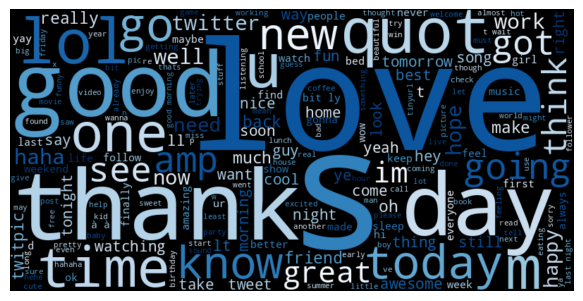

In [34]:

positive_wc = WordCloud(width=800, height=400, background_color='black', colormap='Blues').generate(positive_words)

plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(positive_wc, interpolation='bilinear')
plt.axis('off')

plt.show()

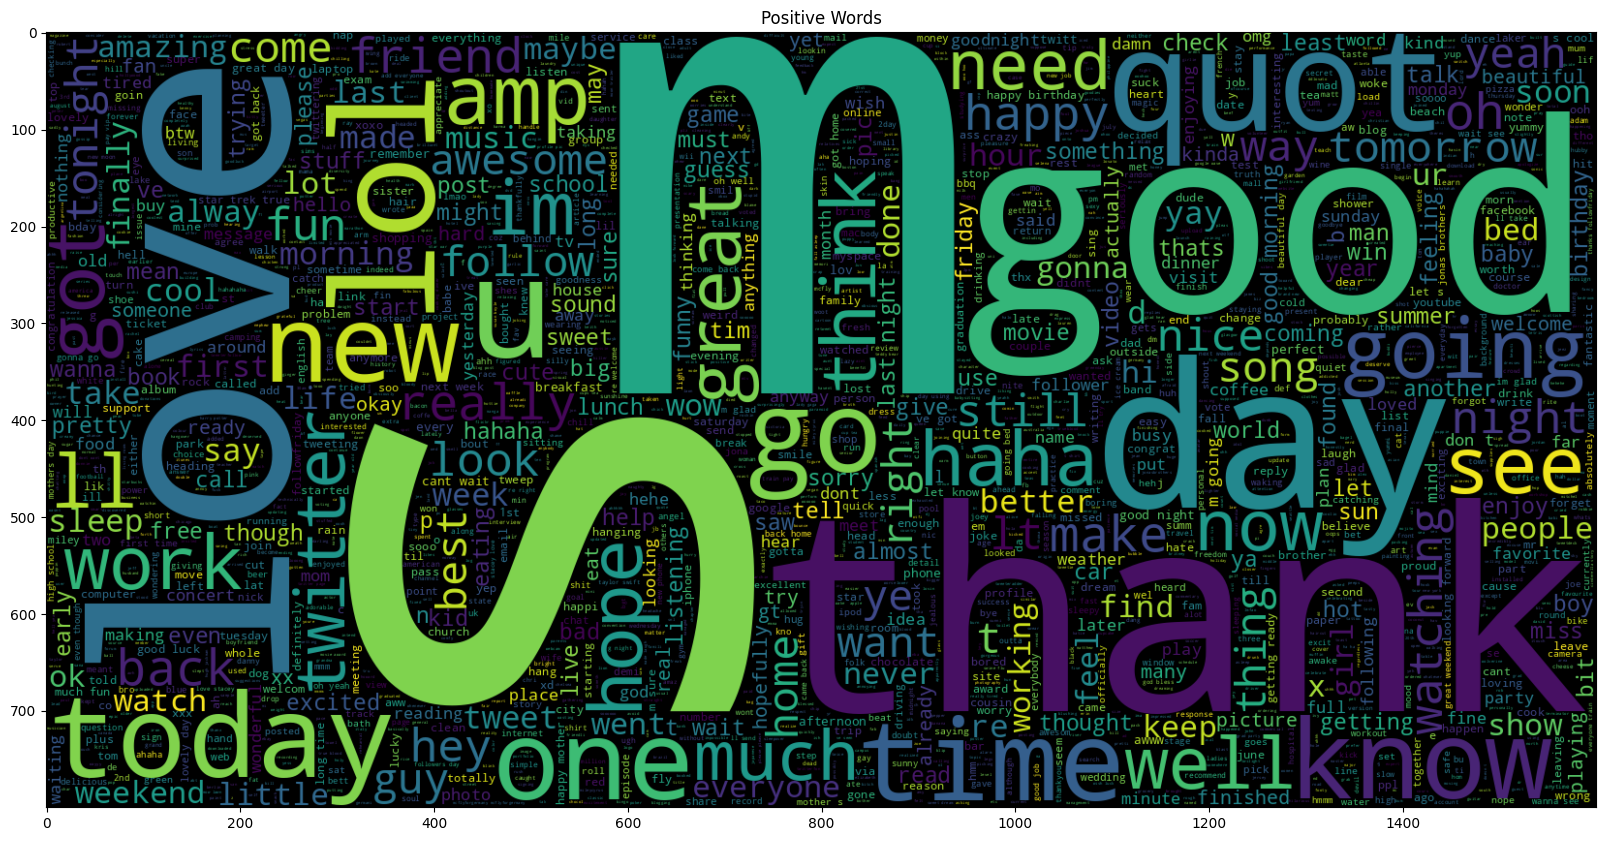

(np.float64(-0.5), np.float64(799.5), np.float64(399.5), np.float64(-0.5))

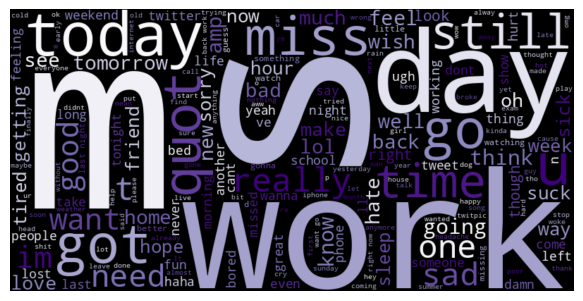

In [35]:
#ENTER YOUR CODE HERE
negative_wc = WordCloud(width=800, height=400, background_color='black', colormap='Purples').generate(negative_words)
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 2)
plt.imshow(negative_wc, interpolation='bilinear')
plt.axis('off')


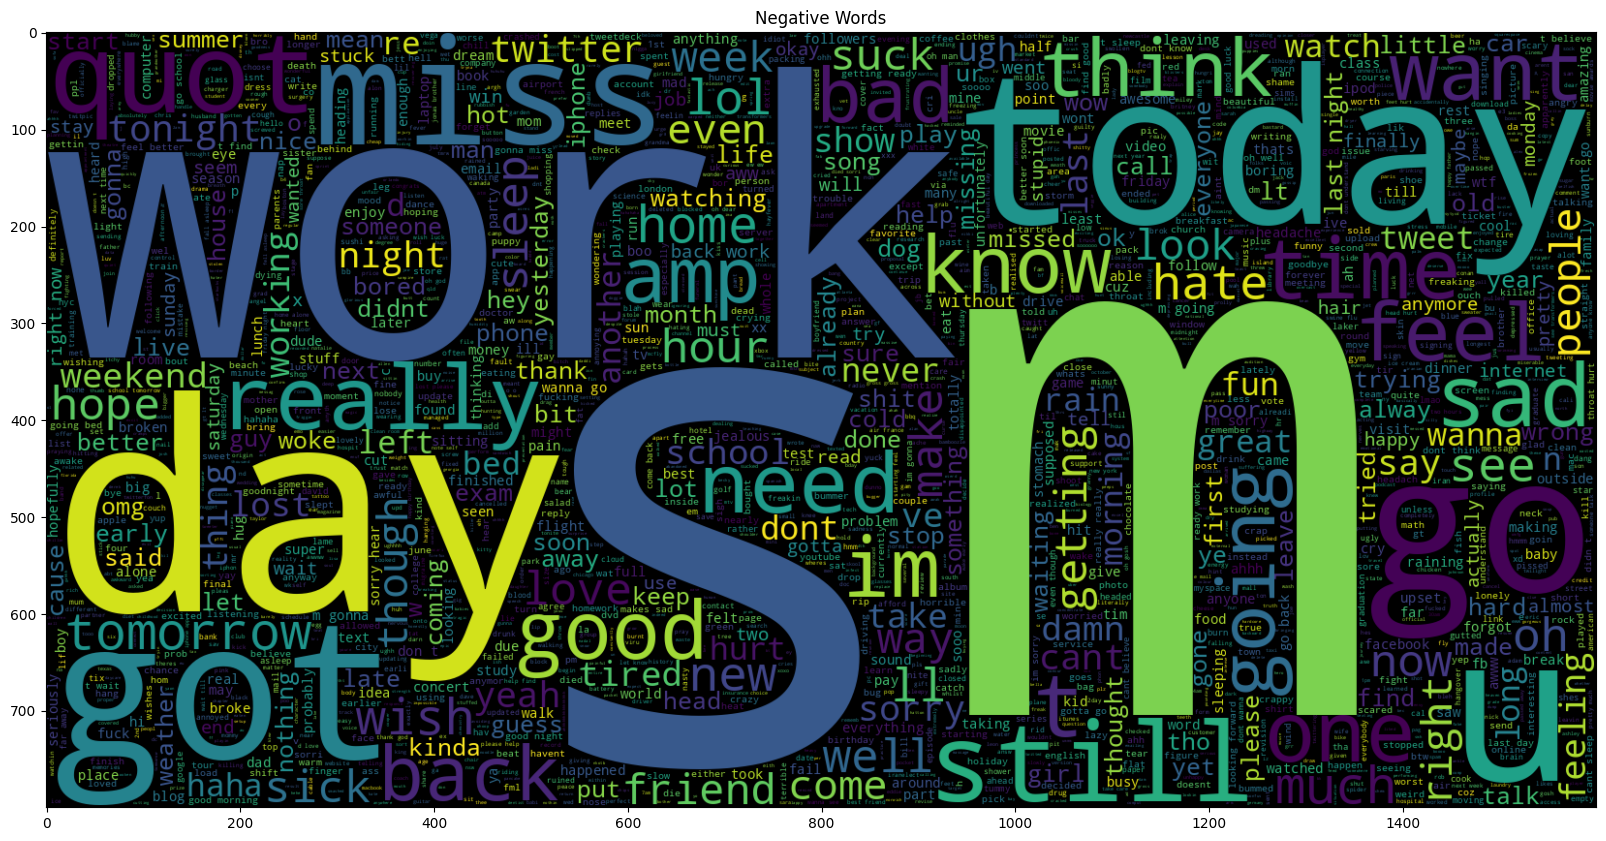

**I'd like to point out that 'Work' is bigger in the negative words display than it is in the positive words one.**

## TRAINING

**We have now processed the data for training. It's time for us to split it into training and test splits.**

In [36]:
#ENTER YOUR CODE HERE
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df['text'],df['sentiment'],test_size = 0.1,random_state=42)
print("Training set size:", len(x_train))
print("Test set size:", len(x_test))

Training set size: 9000
Test set size: 1000


Training Set Size: 9000
Test Set Size: 1000


**It is now time to convert our text sequences into numbers like the model will understand. Fit a tokenizer on the training dataset for the same. Let the vocab size be the no of unique words itself.**

In [37]:
#ENTER YOUR CODE HERE
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
x_train_tokens = x_train.apply(word_tokenize)
x_test_tokens = x_test.apply(word_tokenize)


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [39]:
unique_words = set()

for tokens in x_train_tokens:
    unique_words.update(tokens)
print("vocabulary size:", len(unique_words))

vocabulary size: 12374


Vocabulary Size : 13511


**Now transform the training and testing word sequences.**

In [50]:
#ENTER YOUR CODE HERE
word_index = {}
index =1
for word in unique_words:
  if word not in word_index:
    word_index[word] = index
    index += 1

def tokens_to_seq(tokens):
  return [word_index[word] for word in tokens if word in word_index]

x_train_seq = x_train_tokens.apply(tokens_to_seq)
x_test_seq = x_test_tokens.apply(tokens_to_seq)
print ("train :")
print(x_train_seq.iloc[0])
print ("test :")
print(x_test_seq.iloc[0])

train :
[2466, 10343, 52, 5005, 4863, 9654, 4863, 6032, 10043, 35, 11600]
test :
[4468, 7509, 4524, 2171, 11639, 7603]


Training data:
[1, 25, 411, 5140, 954, 1222, 954, 20, 894, 107, 5141]

Testing data:
[322, 677, 2477, 2488, 181, 618]

**It is necessary for the simplicity of the model that each text sequence be of the same length. Pad the sequences to make this possible.**

In [55]:
#ENTER YOUR CODE HERE
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train_padded = pad_sequences(x_train_seq,maxlen=36,padding='pre',truncating='pre')
x_test_padded = pad_sequences(x_test_seq,maxlen=36,padding='pre',truncating='pre')
print("training data")
print(x_train_padded[0])

training data
[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0  2466 10343    52  5005  4863  9654  4863  6032 10043    35 11600]


Training data:
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    1   25  411
 5140  954 1222  954   20  894  107 5141]
Testing data:
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0  322  677 2477 2488  181  618]


**Label encode y.**

In [60]:
#ENTER YOUR CODE HERE
y_train_encoded = []
for label in y_train:
    if label == 'Positive':
        y_train_encoded.append(1)
    else:
        y_train_encoded.append(0)
y_test_encoded = []
for label in y_test:
    if label == 'Positive':
        y_test_encoded.append(1)
    else:
        y_test_encoded.append(0)
print("training")
print(y_train_encoded)
print("testing")
print(y_test_encoded)

training
[0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 

The training labels:
[0 0 0 ... 1 0 1]
The testing labels:
[1 0 0 0 0 1 0 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 1 0 1
 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0
 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1
 1 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0
 0 0 1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1
 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1
 1 0 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0
 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 1 1 1 0 1 1
 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0
 0 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0
 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0
 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1 0
 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 

**FOLLOWING CODE IS FOR CREATING WORD EMBEDDINGS. DON'T TOUCH IT.JUST REPLACE VOCAB_SIZE WITH THE VOCABULARY SIZE OBTAINED EARLIER.**

In [66]:
import tensorflow as tf
import numpy as np
!wget --no-check-certificate http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2025-06-17 08:21:55--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-06-17 08:21:55--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-06-17 08:21:55--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
  Issued certificate has expired.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zi

In [72]:
GLOVE_EMB = '/content/glove.6B.300d.txt'
EMBEDDING_DIM = 300
LR = 1e-3
BATCH_SIZE = 1024
EPOCHS = 10
MODEL_PATH = '.../content/best_model.hdf5'
embeddings_index = {}
f = open(GLOVE_EMB)
for line in f:
  values = line.split()
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' %len(embeddings_index))

  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector
MAX_SEQUENCE_LENGTH = x_train_padded.shape[1]
embedding_layer = tf.keras.layers.Embedding(len(unique_words) + 1,
                                            EMBEDDING_DIM,
                                            weights=[embedding_matrix],
                                            input_length=MAX_SEQUENCE_LENGTH,
                                            trainable=False)

Found 400000 word vectors.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


![Sequence Model](https://miro.medium.com/max/1458/1*SICYykT7ybua1gVJDNlajw.png)

**You should read up on why we added the previou code block.The embedding layer created is to be used in the model. Use the model summary to build the rest. Compile the model with Adam and a suitable loss function.**

In [80]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout,GlobalMaxPooling1D
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
#ENTER YOUR CODE HERE
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

x = SpatialDropout1D(0.2)(embedding_sequences)

x = Conv1D(64, kernel_size=3, activation='relu')(x)

x = Bidirectional(LSTM(64, return_sequences=True))(x)
from tensorflow.keras.layers import GlobalMaxPooling1D
x = GlobalMaxPooling1D()(x)

x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)

preds = Dense(1, activation='sigmoid')(x)

model = Model(sequence_input, preds)

model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 36)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 36, 300)        │     3,712,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_3             │ (None, 36, 300)        │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 34, 64)         │        57,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 34, 128)        │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_2          │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,844,533 (14.67 MB)

 Trainable params: 132,033 (515.75 KB)

 Non-trainable params: 3,712,500 (14.16 MB)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 36)]              0         
                                                                 
 embedding_1 (Embedding)     (None, 36, 300)           4053300   
                                                                 
 spatial_dropout1d_1 (Spati  (None, 36, 300)           0         
 alDropout1D)                                                    
                                                                 
 conv1d_1 (Conv1D)           (None, 32, 64)            96064     
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               66048     
 onal)                                                           
                                                                 
 dense_3 (Dense)             (None, 512)               6604

**Train the model on the train split, and validate it on the test split.**

In [82]:
#ENTER YOUR CODE HERE
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
y_train_encoded = np.array(y_train_encoded)
y_test_encoded = np.array(y_test_encoded)
history = model.fit(
    x_train_padded,
    y_train_encoded,
    validation_data=(x_test_padded, y_test_encoded),
    epochs=10,
    batch_size=32,
    callbacks=[checkpoint]

Epoch 1/10
281/282 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.8988 - loss: 0.2295
Epoch 1: val_accuracy improved from -inf to 0.70000, saving model to best_model.h5


282/282 ━━━━━━━━━━━━━━━━━━━━ 25s 88ms/step - accuracy: 0.8988 - loss: 0.2295 - val_accuracy: 0.7000 - val_loss: 0.7768
Epoch 2/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9204 - loss: 0.1922
Epoch 2: val_accuracy improved from 0.70000 to 0.71300, saving model to best_model.h5


282/282 ━━━━━━━━━━━━━━━━━━━━ 32s 55ms/step - accuracy: 0.9204 - loss: 0.1923 - val_accuracy: 0.7130 - val_loss: 0.8305
Epoch 3/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9264 - loss: 0.1813
Epoch 3: val_accuracy did not improve from 0.71300
282/282 ━━━━━━━━━━━━━━━━━━━━ 16s 55ms/step - accuracy: 0.9264 - loss: 0.1813 - val_accuracy: 0.7080 - val_loss: 0.8778
Epoch 4/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9379 - loss: 0.1625
Epoch 4: val_accuracy did not improve from 0.71300
282/282 ━━━━━━━━━━━━━━━━━━━━ 16s 58ms/step - accuracy: 0.9379 - loss: 0.1626 - val_accuracy: 0.7040 - val_loss: 0.8128
Epoch 5/10
281/282 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9440 - loss: 0.1492
Epoch 5: val_accuracy did not improve from 0.71300
282/282 ━━━━━━━━━━━━━━━━━━━━ 20s 55ms/step - accuracy: 0.9439 - loss: 0.1492 - val_accuracy: 0.6970 - val_loss: 0.9715
Epoch 6/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.9443 - loss: 0.1463
Epoch 6: val_accuracy d

Epoch 1/10
9/9 [==============================] - 39s 3s/step - loss: 0.6791 - accuracy: 0.5733 - val_loss: 0.6374 - val_accuracy: 0.6330
Epoch 2/10
9/9 [==============================] - 19s 2s/step - loss: 0.6207 - accuracy: 0.6628 - val_loss: 0.6137 - val_accuracy: 0.6540
Epoch 3/10
9/9 [==============================] - 19s 2s/step - loss: 0.5882 - accuracy: 0.6919 - val_loss: 0.5981 - val_accuracy: 0.6700
Epoch 4/10
9/9 [==============================] - 15s 2s/step - loss: 0.5676 - accuracy: 0.7080 - val_loss: 0.5911 - val_accuracy: 0.6670
Epoch 5/10
9/9 [==============================] - 22s 3s/step - loss: 0.5480 - accuracy: 0.7160 - val_loss: 0.5849 - val_accuracy: 0.6890
Epoch 6/10
9/9 [==============================] - 13s 1s/step - loss: 0.5273 - accuracy: 0.7290 - val_loss: 0.5836 - val_accuracy: 0.6880
Epoch 7/10
9/9 [==============================] - 22s 2s/step - loss: 0.5094 - accuracy: 0.7477 - val_loss: 0.5846 - val_accuracy: 0.7070
Epoch 8/10
9/9 [==================

**Let's visualise the model's training history now.**

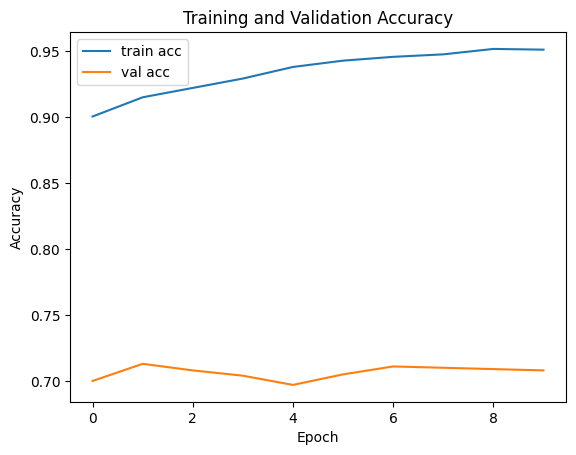

In [83]:
#ENTER YOUR CODE HERE
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

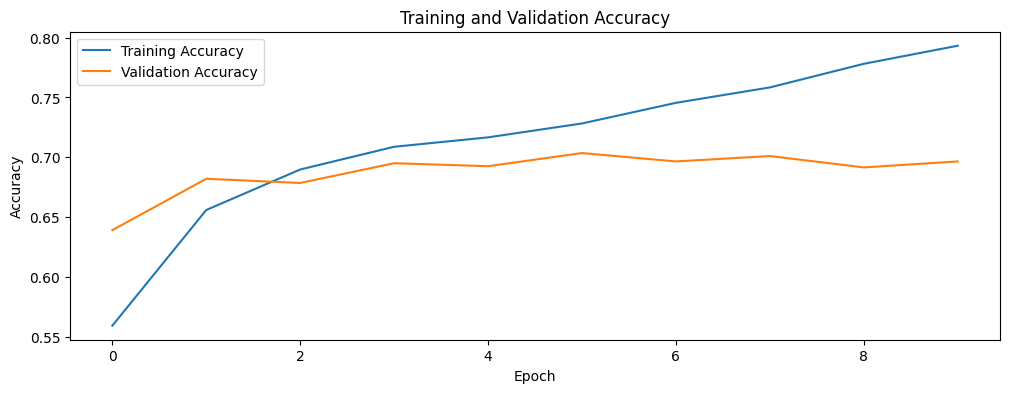

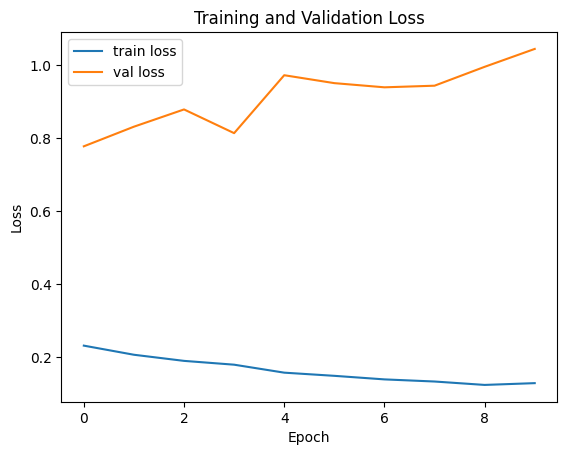

In [84]:
#ENTER YOUR CODE HERE
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

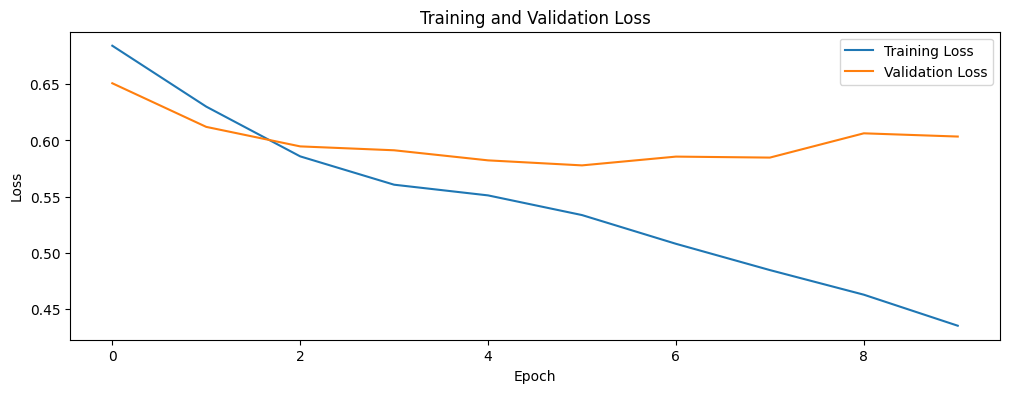

**Lets see what the accuracy of the model is.**

In [87]:
#ENTER YOUR CODE HERE
from sklearn.metrics import classification_report
y_pred_probs = model.predict(x_test_padded)
y_pred = (y_pred_probs > 0.5).astype("int32")
print(classification_report(y_test_encoded, y_pred, target_names=['0', '1']))

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step
              precision    recall  f1-score   support

           0       0.73      0.65      0.69       492
           1       0.69      0.76      0.73       508

    accuracy                           0.71      1000
   macro avg       0.71      0.71      0.71      1000
weighted avg       0.71      0.71      0.71      1000



63/63 [==============================] - 2s 24ms/step
              precision    recall  f1-score   support

           0       0.72      0.66      0.69      1012
           1       0.68      0.73      0.70       988

    accuracy                           0.70      2000
   macro avg       0.70      0.70      0.70      2000
weighted avg       0.70      0.70      0.70      2000



**Take a random input sequence from the text series. First predict on it nd gets its sentiment. Then decode the string using the tokenizer, etc. you've developed and print the string as well.**

In [108]:
#ENTER YOUR CODE HERE
print(df.text[0])
print(tokens_to_seq (word_tokenize(df.text[0])))
new_seq = pad_sequences([tokens_to_seq (word_tokenize(df.text[0]))],maxlen=36,padding='pre',truncating='pre')
print(new_seq)
prediction =model.predict(new_seq)
sentiment = 'Positive' if prediction[0][0] > 0.5 else 'Negative'
print(f"Predicted sentiment: {sentiment}")

oh no u order from that s horrible
[9751, 3098, 482, 10086, 3562, 688, 1742, 39]
[[    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0  9751  3098   482 10086  3562   688  1742    39]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Predicted sentiment: Negative


The chosen sequence is: [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0  402 2498  165   91  201    5]
1/1 [==============================] - 1s 835ms/step
The predicted sentiment is: ['Negative']
The original sentiment is: ['Negative']


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [109]:
#ENTER YOUR CODE HERE
print(df.text[0])

oh no u order from that s horrible


['dad', 'fever', 'again', 'not', 'looking', 'good']


**We can try this on a random string as well.**

In [104]:
input_str="I hate everyone on earth!"
#ENTER YOUR CODE HERE

print("After removal of stopwords:")
print(remove_stopwords(input_str))
input_str = remove_stopwords(input_str)
print("After removal of punctuations:")
print(remove_punc(input_str))
input_str = remove_punc(input_str)
print("After lemmatization:")
print(lemmatize_words(input_str))
input_str = lemmatize_words(input_str)
input_str = lemmatize_words(input_str)
print(tokens_to_seq (word_tokenize(input_str)))
input_seq = pad_sequences([tokens_to_seq (word_tokenize(input_str))],maxlen=36,padding='pre',truncating='pre')
print(input_seq)
prediction =model.predict(input_seq)
sentiment = 'Positive' if prediction[0][0] > 0.5 else 'Negative'
print(f"Predicted sentiment: {sentiment}")


After removal of stopwords:
I hate everyone   earth!
After removal of punctuations:
I hate everyone   earth 
After lemmatization:
I hate everyone earth
[1743, 10049, 1267]
[[    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0  1743 10049  1267]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Predicted sentiment: Negative


After removal of stopwords: 0    I hate everyone earth!
dtype: object
After removal of punctuation: 0    I hate everyone earth 
dtype: object
After stemming: 0    i hate everyone earth 
dtype: object
After tokenization: [[1, 100, 138, 2693]]
After padding: [[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    1  100  138 2693]]
1/1 [==============================] - 0s 58ms/step
The predicted sentiment is: ['Negative']


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## GOOD JOB!